# Prerequisities

In [35]:
pip install arff numpy pandas matplotlib sklearn seaborn keras tensorflow scikeras tensorflow_addons

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


# Import libraries

In [37]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras.backend as K
from numpy.random import seed
import tensorflow_addons as tfa

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)

# Data preprocessing

## Split train-test data

In [52]:
%store -r features
%store -r core_features
%store -r data_frame

X = data_frame[core_features]
Y = data_frame['Effort']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## Normalize the data

In [53]:
# Scaling X data
scaler_x = StandardScaler()  

# fit only on training data
scaler_x.fit(X_train)  
X_train = scaler_x.transform(X_train)  

# apply same transformation to test data
X_test = scaler_x.transform(X_test)  

In [54]:
print(X_train[:5])
print(X_test[:5])

[[-0.98555126 -0.69819277 -0.94989012 -0.94529677 -0.91902751]
 [-0.98555126 -0.57575285 -0.31451963 -0.58682277 -0.47098509]
 [-1.12835085 -0.38887087 -0.81284943 -0.6431544  -0.53139531]
 [-0.84275168  0.77108624  0.22118491  0.70368362  0.81273194]
 [-0.69995209 -0.69174856  0.17135193 -0.47928057 -0.48105346]]
[[-0.98555126 -0.29865198 -0.2522284  -0.34101203 -0.39043814]
 [ 0.8708434   0.84197251  0.05922772  0.6934415   0.73721917]
 [ 1.44204176 -0.12465841 -0.18993718 -0.1771382  -0.24444679]
 [ 0.15684545  0.42954332 -0.77547469  0.02258302  0.0827752 ]
 [ 0.01404586 -0.35664984  0.81918067  0.05330936  0.37979208]]


In [55]:
# Scaling Y data

# reshape data
Y_train = Y_train.to_numpy().reshape(-1, 1)
Y_test = Y_test.to_numpy().reshape(-1, 1)

scaler_y = StandardScaler()  

# fit only on training data
scaler_y.fit(Y_train)  
Y_train = scaler_y.transform(Y_train)  

# apply same transformation to test data
Y_test = scaler_y.transform(Y_test) 

In [56]:
print(Y_train[:5])
print(Y_test[:5])

[[-0.49444569]
 [-0.39919983]
 [-0.9172036 ]
 [ 0.30595368]
 [-0.13518501]]
[[-0.5596139 ]
 [ 1.10802402]
 [-0.10176541]
 [ 0.15723647]
 [ 1.98863042]]


# Multi-layer perceptron

In [6]:
seed(42)

NUMBER_OF_EPOCHS = 1000
BATCH_SIZE = 32
STEPS_PER_EPOCH = len(X_train) / BATCH_SIZE

verbosity = 1
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 0.01

### GridSearch the best model configuration

In [11]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(16, input_shape=(5,), activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=NUMBER_OF_EPOCHS, batch_size=BATCH_SIZE, verbose=1)

optimizer = ['SGD', 'Adagrad', 'Adam', 'Adadelta', 'Adamax', 'Ftrl']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=6)
grid_result = grid.fit(X_train, Y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_874496/3328610972.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=NUMBER_OF_EPOCHS, batch_size=BATCH_SIZE, verbose=1)


Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
2/2 [==============================] - 1s 2ms/step - loss: 0.7969 - mse: 0.7969
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7793 - mse: 0.7793
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7651 - mse: 0.7651
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7539 - mse: 0.7539
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7435 - mse: 0.7435
Epoch 6/1000
2/2 [==============================] - 1s 6ms/step - loss: 0.6465 - mse: 0.6465
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5698 - mse: 0.5698
Epoch 7/1000
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4936 - mse: 0.4936
Epoch 8/1000
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7219 - mse: 0.7219
Epoch 5/1000
Epoch 9/1000
2/2 [==============================] - 0s 2ms/

### Build the model using Adagrid, as GridSearch found to be best

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras.backend as K
from numpy.random import seed

seed(1)

NUMBER_OF_EPOCHS = 1000
BATCH_SIZE = 32
STEPS_PER_EPOCH = len(X_train) / BATCH_SIZE

verbosity = 1
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 0.01

model = Sequential()
model.add(Dense(16, input_shape=(5, ), activation='relu'))
# output layer
model.add(Dense(1))

model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate = learning_rate), loss = loss_function)

# overview on the model architecture
print(model.summary())

#train the model
history = model.fit(X_train, Y_train, steps_per_epoch = STEPS_PER_EPOCH, epochs = NUMBER_OF_EPOCHS)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_248 (Dense)           (None, 16)                96        
                                                                 
 dense_249 (Dense)           (None, 1)                 17        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7082
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6567
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6258
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6049
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5888
Epoch 6/1000
2/2 [==============================] -

In [33]:
loss = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = verbosity)

1/1 [==============================] - 0s 68ms/step - loss: 0.1818


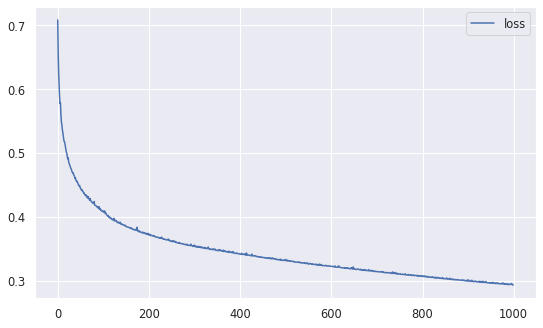

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [51]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 220ms/step


### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
loss_per_fold = []
path = 'desharnais_16_relu_001_adagrad_1000_32_mse.hdf5' 
best_score = 99999

for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Dense(16, input_shape=(5, ), activation='relu'))
    # output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate = learning_rate), loss = loss_function)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} of {num_folds} ...')

    # Fit data to model
    history = model.fit(X_train, Y_train, steps_per_epoch = STEPS_PER_EPOCH, epochs = NUMBER_OF_EPOCHS)
    
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.savefig("10-fold-losses/loss_fold_%s.png" % (fold_no))

    # Generate generalization metrics
    score = model.evaluate(inputs[test], targets[test], verbose=0)
    print("Score for fold %d: %s of %f" % (fold_no, model.metrics_names[0], score))
    loss_per_fold.append(score)
    
    if best_score > score:
        # the path and name of the model
        model.save(path)
        best_score = score

        # save data distribution
        numpy.savetxt("x_train.csv", w, delimiter=",")
        numpy.savetxt("y_train.csv", w, delimiter=",")
        numpy.savetxt("x_test.csv", w, delimiter=",")
        numpy.savetxt("y_test.csv", w, delimiter=",")
        
        print("Saving model for fold %d ..." % (fold_no))

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 of 10 ...
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5234
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4391
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4367
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4255
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4199
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4144
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4299
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4122
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4170
Epoch 12/1000
1/1 [=======

In [ ]:
# Visualize loss for each iteration
import plotly.graph_objects as go
labels = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10']

fig = go.Figure(data=[
    go.Bar(name='Loss', x=labels, y=loss_per_fold)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### Load the model
We use the best model 10-fold cross validation found

In [43]:
model = keras.models.load_model('models/desharnais_fold_6_loss_0.057849.hdf5')

In [47]:
X_train = np.genfromtxt('dataset-distribution/x_train_fold_6.csv', delimiter=',')
Y_train = np.genfromtxt('dataset-distribution/y_train_fold_6.csv', delimiter=',')
X_test = np.genfromtxt('dataset-distribution/x_test_fold_6.csv', delimiter=',')
Y_test = np.genfromtxt('dataset-distribution/y_test_fold_6.csv', delimiter=',')

loss = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = verbosity)

1/1 [==============================] - 0s 86ms/step - loss: 0.0578


In [48]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


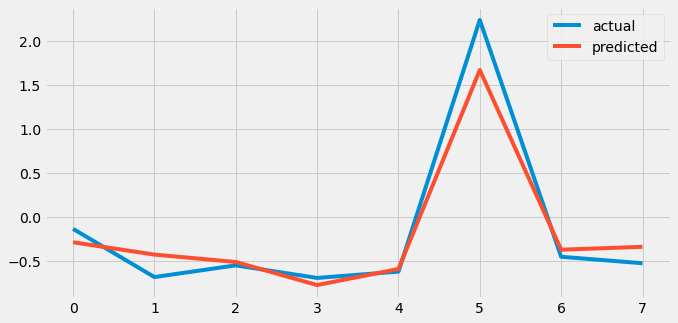

In [49]:
plt.plot(Y_test, label='actual')
plt.plot(Y_pred, label='predicted')
plt.legend()
plt.show()

In [55]:
# R-squared value
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_test, Y_pred.ravel())
result = metric.result()
result.numpy()

0.9329073

### AdaBoost optimisation

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

preped_model = KerasRegressor(build_fn=model, epochs=NUMBER_OF_EPOCHS, batch_size=BATCH_SIZE, verbose=1)

boosted_model = AdaBoostRegressor(base_estimator= preped_model)
hist = boosted_model.fit(X_train, Y_train.ravel())

INFO:tensorflow:Assets written to: ram:///tmp/tmpgddh46t9/assets
Epoch 1/1000


/home/ioana/.local/lib/python3.10/site-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step - loss: 0.4034
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4040
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4027
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4025
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4015
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3992
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4014
Epoch 11/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4004
Epoch 12/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3987
Epoch 13/1000
3/3 [==============================] - 0s 2ms/st

/home/ioana/.local/lib/python3.10/site-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3378
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3370
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3332
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3328
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 11/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3316
Epoch 12/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3315
Epoch 13/1000
3/3 [==============================] - 0s 2ms/st

/home/ioana/.local/lib/python3.10/site-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step - loss: 0.7371
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7022
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.6375
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5938
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5704
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5604
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5518
Epoch 9/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5445
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5290
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5237
Epoch 12/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5122
Epoch 13/1000
3/3 [==============================] - 0s 2ms/st

/home/ioana/.local/lib/python3.10/site-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step - loss: 0.8079
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7726
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7652
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.7475
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7397
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7388
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7389
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7444
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7358
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7333
Epoch 11/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7350
Epoch 12/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7323
Epoch 13/1000
3/3 [==============================] - 0s 2ms/st

In [62]:
boosted_model.score(X_test, Y_test)

1/1 [==============================] - 0s 25ms/step


0.9699026466859687

In [63]:
Y_pred = boosted_model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


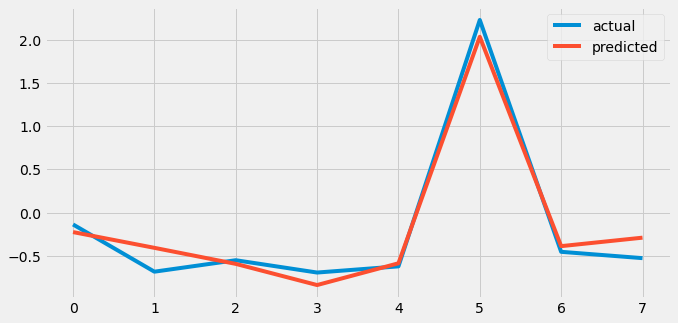

In [64]:
plt.plot(Y_test, label='actual')
plt.plot(Y_pred, label='predicted')
plt.legend()
plt.show()

In [68]:
# Loss value
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(Y_test, Y_pred.ravel())
loss = mse.result().numpy()
print(loss)

0.025950752


### Save the model

In [ ]:
import pickle

# save
with open('models/boosted_model.pkl','wb') as f:
    pickle.dump(boosted_model,f)

INFO:tensorflow:Assets written to: ram:///tmp/tmpzlcwxc8y/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmplotn1y3l/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpjil1p_bs/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp1egwq8pq/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpl9eu3fp_/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp7kmpq36b/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp_exskgly/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp1emx9vmn/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp21gyvax2/assets


### Load the model

In [31]:
with open('models/boosted_model.pkl', 'rb') as f:
    model = pickle.load(f)

Y_pred = model.predict(X_test)
model.score(X_test, Y_test)

1/1 [==============================] - 0s 15ms/step


0.9305348883551302